<a href="https://colab.research.google.com/github/Yamuna-anchuri/Wetland-Detection/blob/main/Wetland_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT IMPORTANT LIBRARIES**

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import files
from google.colab.patches import cv2_imshow

**LOAD IMAGES**

In [ ]:
image=[]
uploaded=files.upload()
img1=cv2.imread('2020.jpg')
img2=cv2.imread('2021.jpg')
img3=cv2.imread('2022.jpg')
img4=cv2.imread('2023.jpg')
img5=cv2.imread('2024.jpg')


image.append(img1)
image.append(img2)
image.append(img3)
image.append(img4)
image.append(img5)


**REDUCE NOISE**

In [ ]:
#Gaussian blur
for i in image:
  i = cv2.GaussianBlur(i, (5,5),0)

**USE KMEANS ALGORITHM FOR SEGMENTATION**

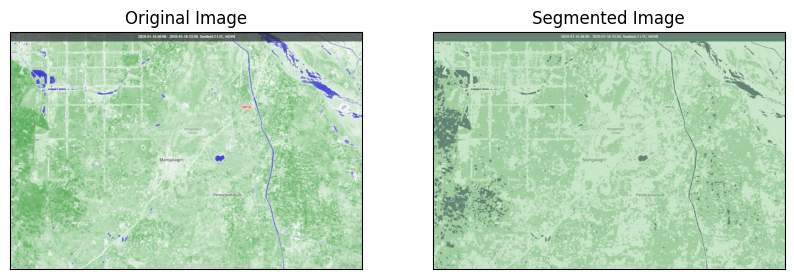

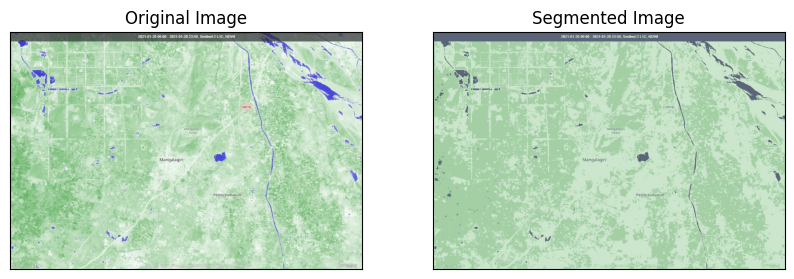

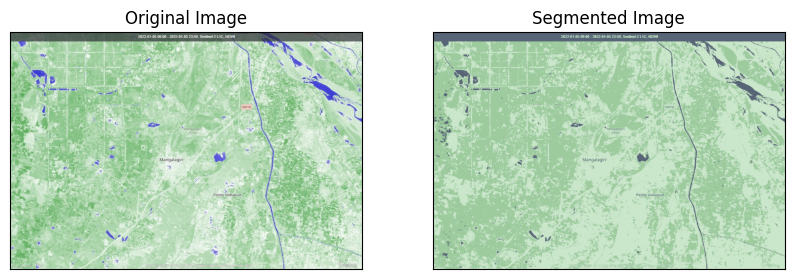

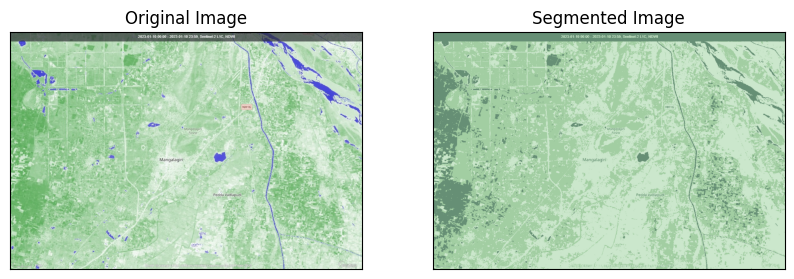

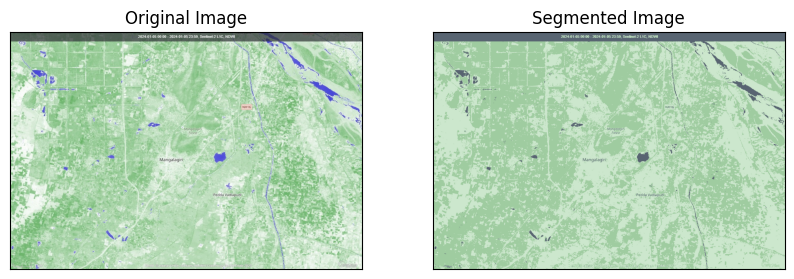

5


In [ ]:
result=[]
for i in image:
  i=cv2.cvtColor(i,cv2.COLOR_BGR2RGB)
  vectorized = i.reshape((-1,3))
  vectorized = np.float32(vectorized)
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
  K=3
  attempts=10
  ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
  center = np.uint8(center)
  res = center[label.flatten()]
  result_image = res.reshape((i.shape))

  result.append(result_image)
  figure_size = 10
  plt.figure(figsize=(figure_size,10))
  plt.subplot(1,2,1),plt.imshow(i)
  plt.title('Original Image'), plt.xticks([]), plt.yticks([])
  plt.subplot(1,2,2),plt.imshow(result_image)
  plt.title('Segmented Image'), plt.xticks([]), plt.yticks([])
  plt.show()

print(len(result))

In [ ]:
from PIL import Image
x=[]
m= Image.fromarray(result[0])
n= Image.fromarray(result[1])
o= Image.fromarray(result[2])
p= Image.fromarray(result[3])
q= Image.fromarray(result[4])

m.save("s1.png","PNG")
n.save("s2.png","PNG")
o.save("s3.png","PNG")
p.save("s4.png","PNG")
q.save("s5.png","PNG")

x=[1,1,1,1,1]

**MASKED IMAGE**


Masked Image of s1.png



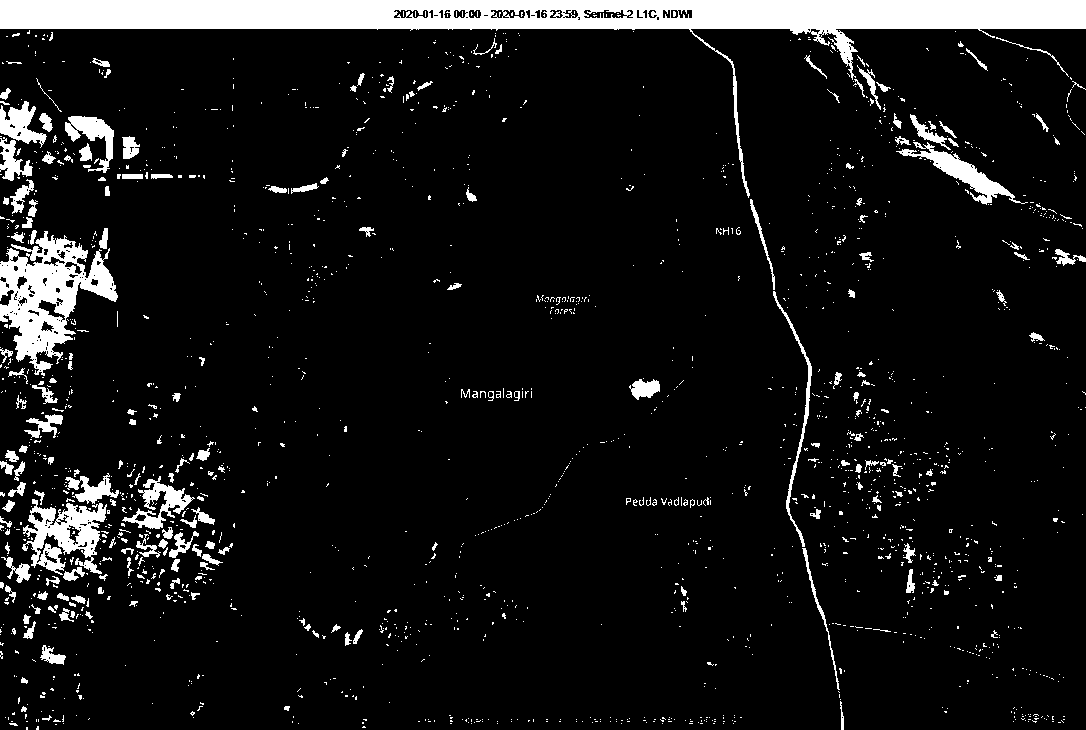




Masked Image of s2.png



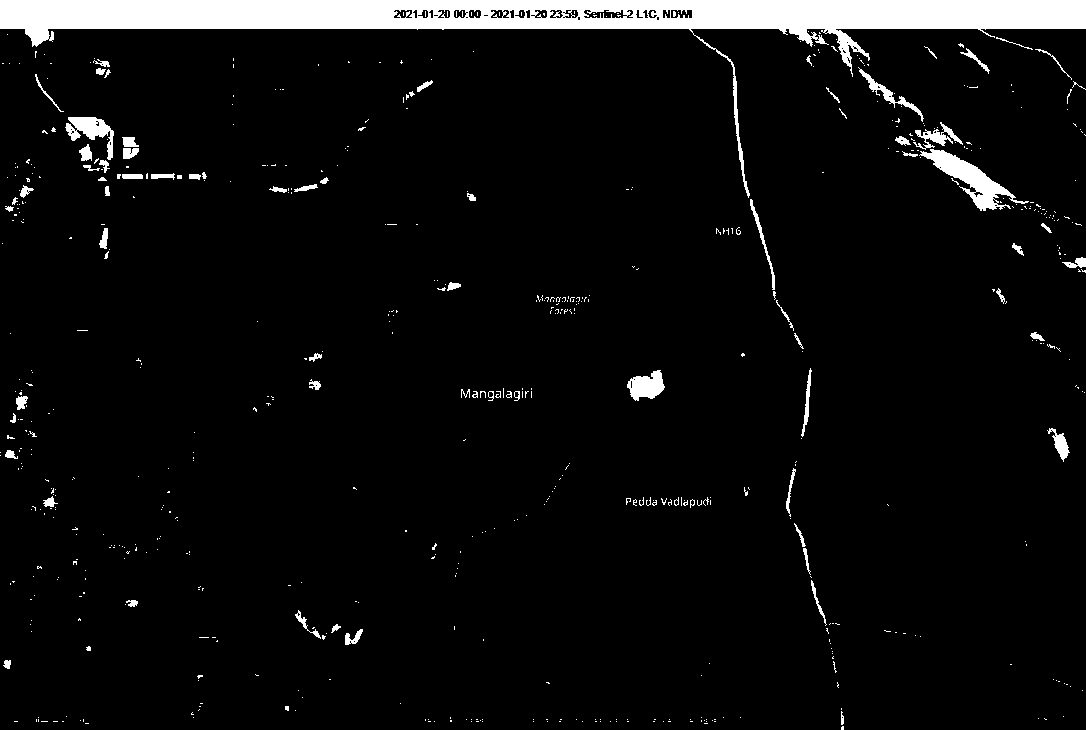




Masked Image of s3.png



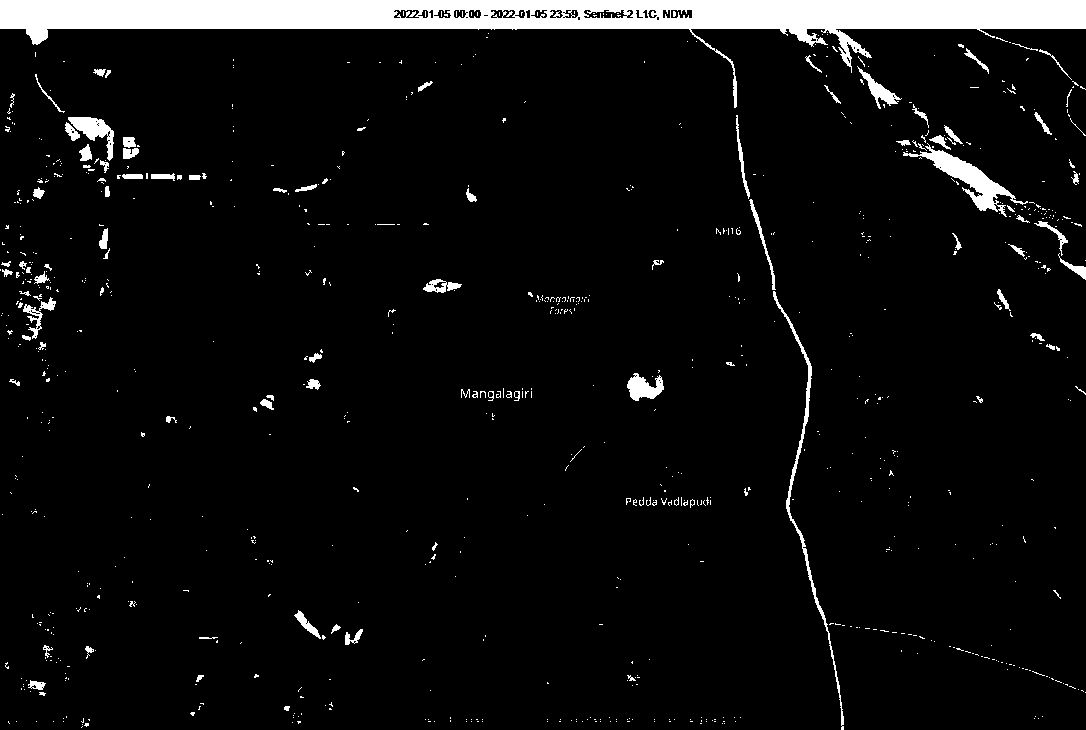




Masked Image of s4.png



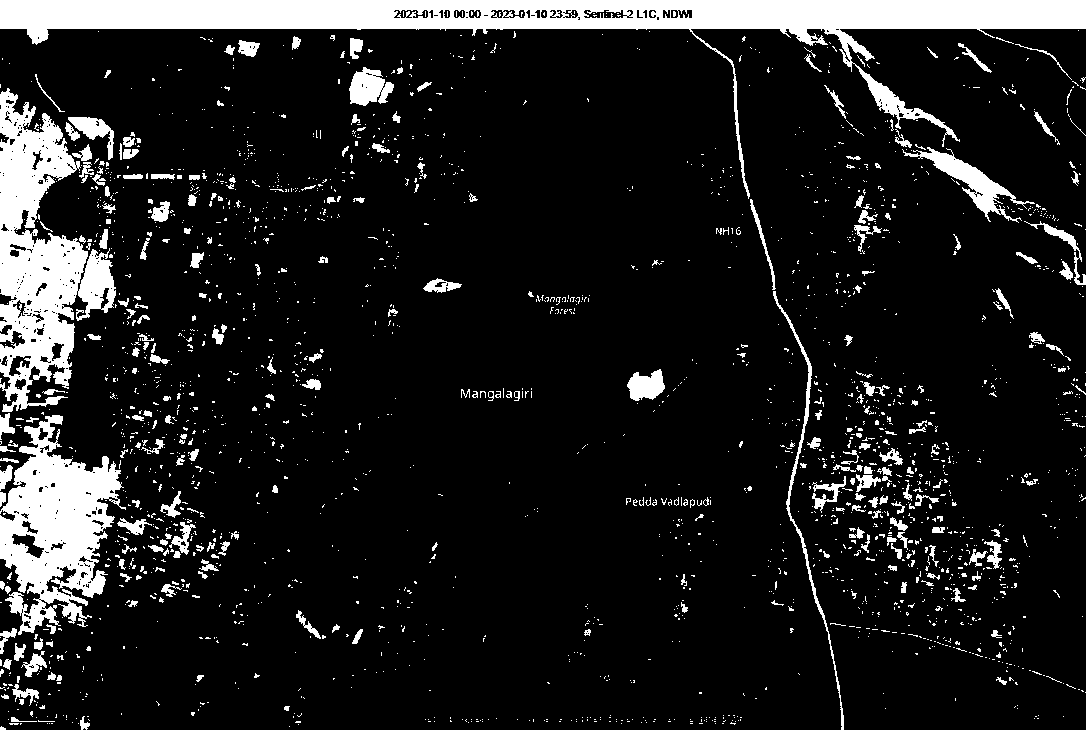




Masked Image of s5.png



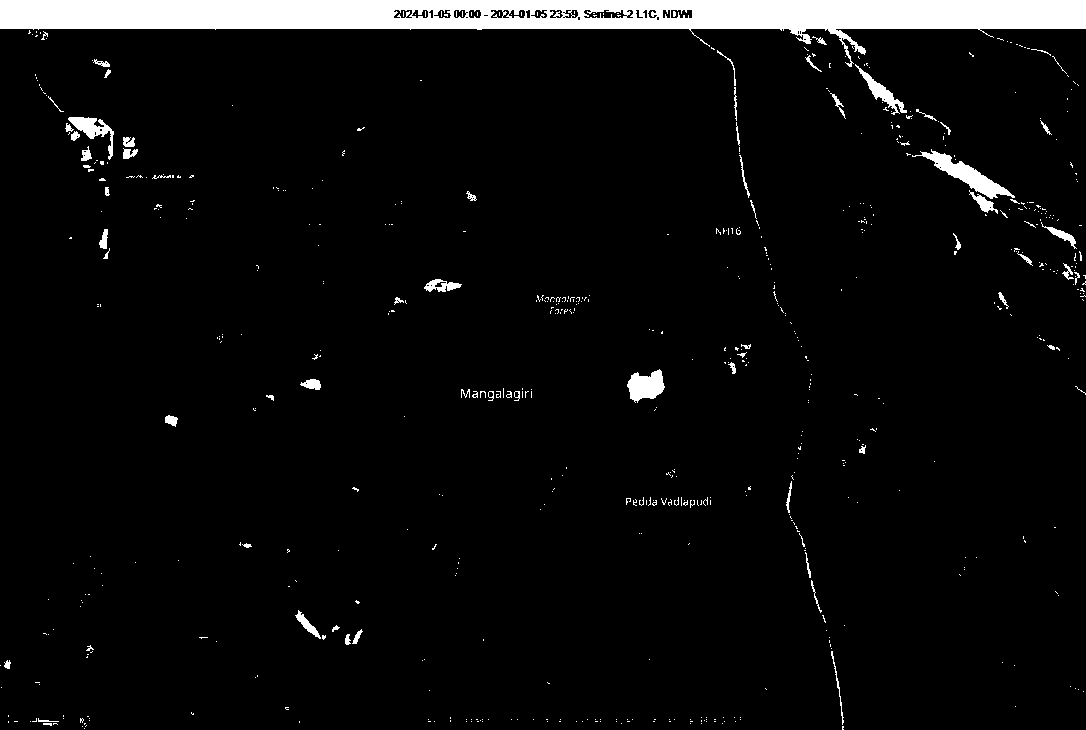

In [ ]:
import cv2
import numpy as np
masked=[]
for i in range(1,len(x)+1):
    frame =cv2.imread("s"+str(i)+".png")
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # l_b = np.array([95,145,45])
    # u_b = np.array([147, 255, 255])

    l_b = np.array([70,20,20])
    u_b = np.array([130, 255, 255])

    mask = cv2.inRange(hsv, l_b, u_b)
    masked.append(mask)
    res = cv2.bitwise_and(frame, frame, mask=mask)

    print("\nMasked Image of s"+str(i)+".png\n")


    cv2_imshow(mask)
    print("\n")
    key = cv2.waitKey(1)
    if key == 27:
        break

cv2.destroyAllWindows()

In [ ]:
from PIL import Image
y=[]
s= Image.fromarray(masked[0])
l= Image.fromarray(masked[1])
m= Image.fromarray(masked[2])
n= Image.fromarray(masked[3])
s.save("m1.png","PNG")
l.save("m2.png","PNG")
m.save("m3.png","PNG")
n.save("m4.png","PNG")
y=[1,1,1,1]

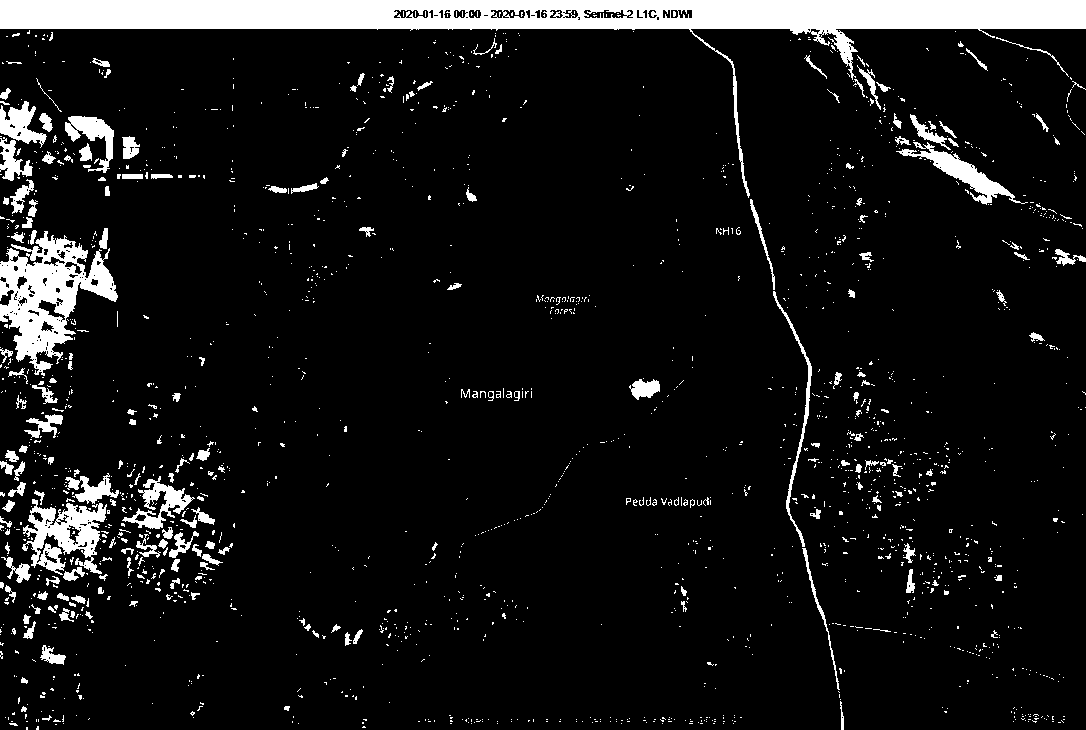

0.08626983526325084
1778.2179999999998


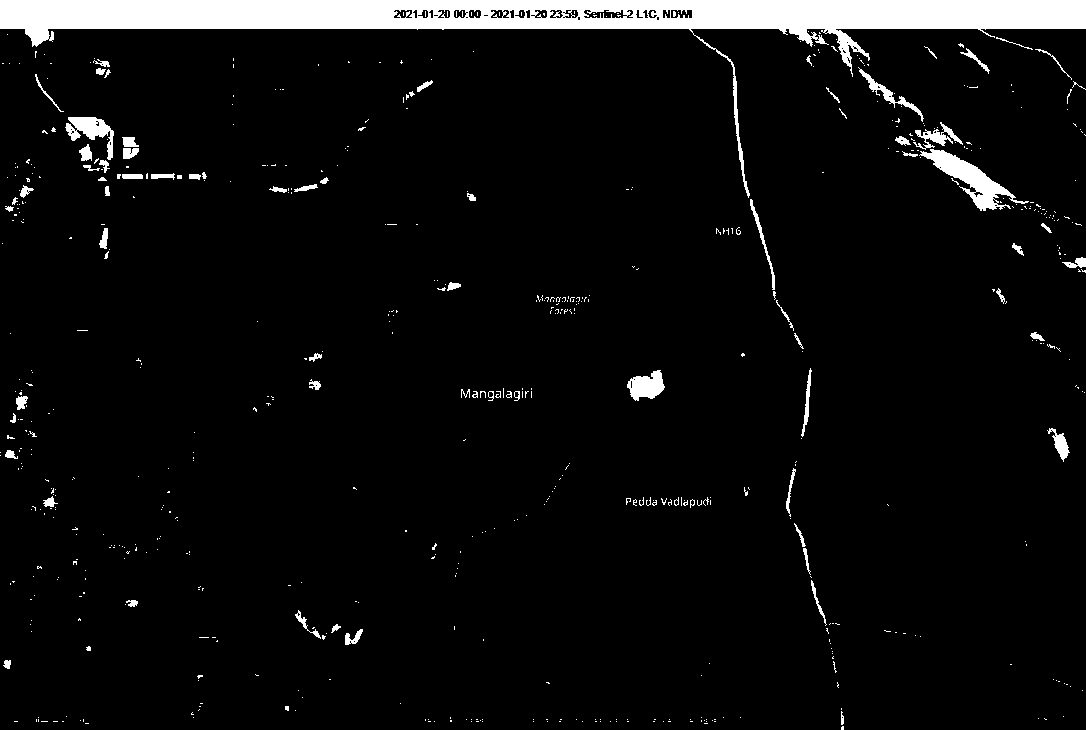

0.05464693862105502
1126.398


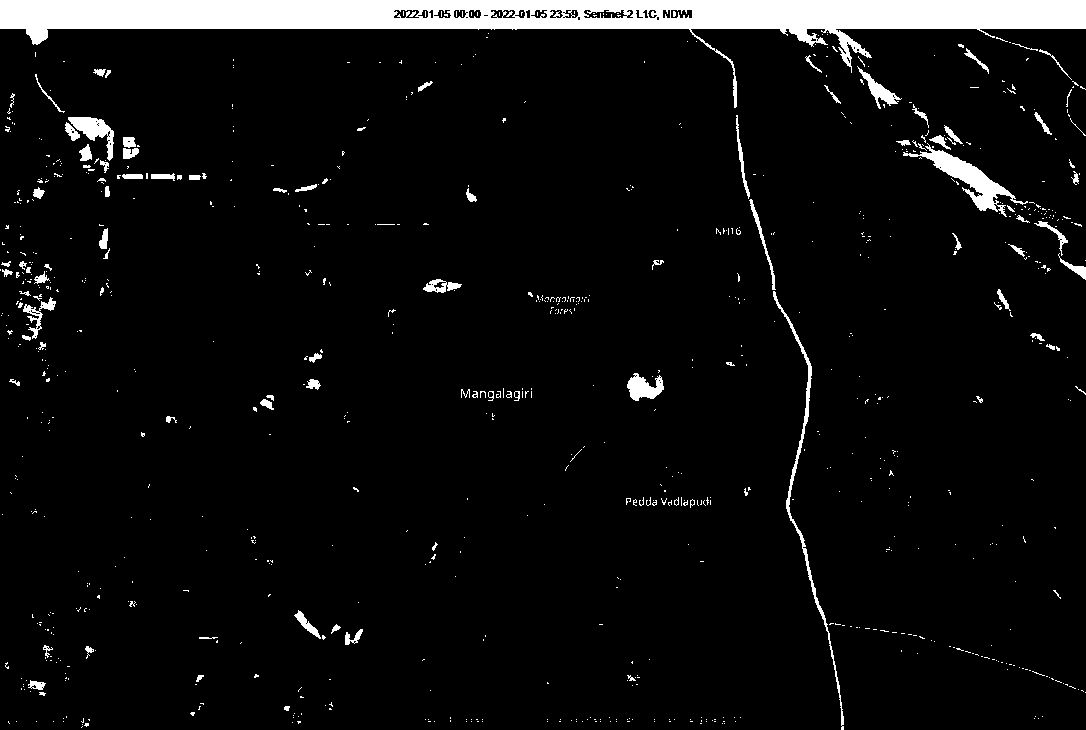

0.0575632584071243
1186.5100000000002


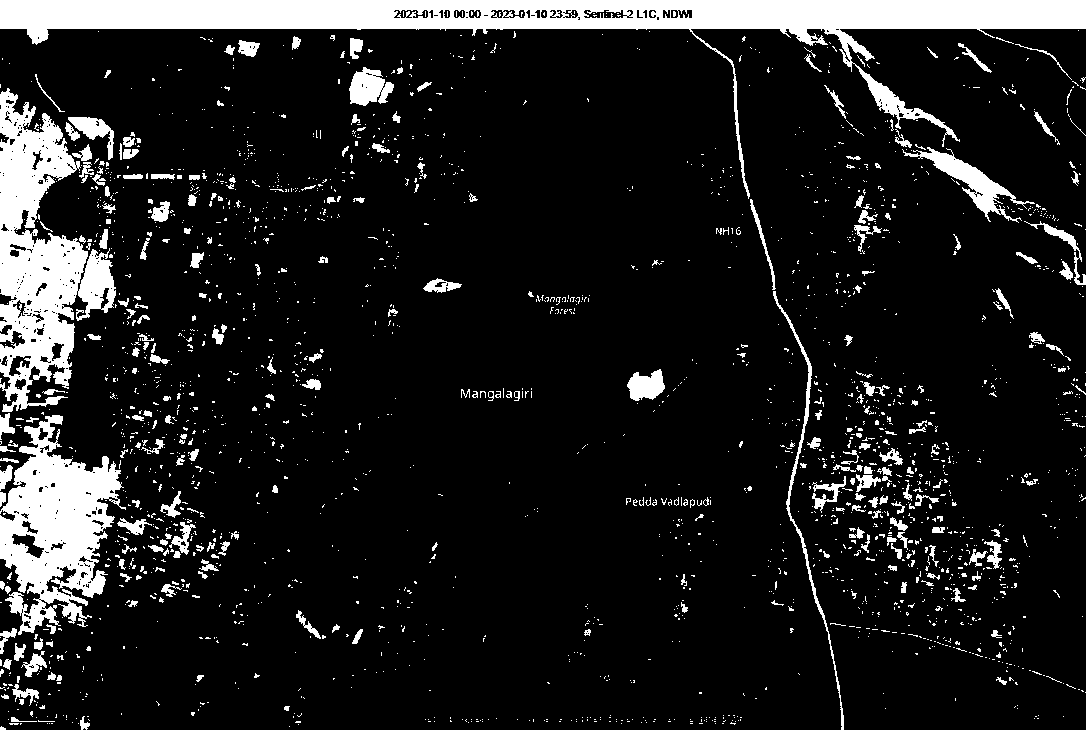

0.12058452534120437
2485.522


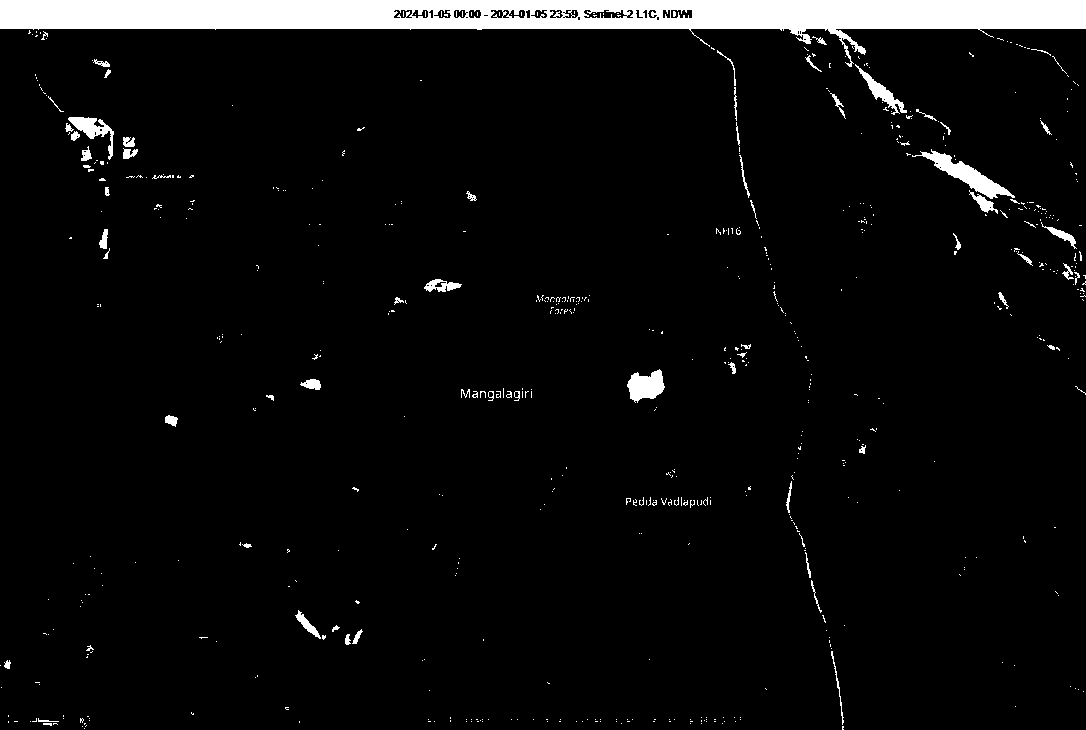

0.05013496808698504
1033.3959999999997


In [ ]:
import cv2
import numpy as np
white=[]
# reading the image data from desired directory

for i in masked:
  height = i.shape[0]
  width = i.shape[1]

  ret, thresh = cv2.threshold(i,0,255,cv2.THRESH_BINARY)
  cv2_imshow(thresh)
  cv2.waitKey(0)
  cv2.destroyAllWindows()
  ave = cv2.mean(thresh)[0]/255
  print(ave)
  area = ave*height*width
  print(area*0.026)
  white.append(area*0.026)

**PLOTTING CHANGES**

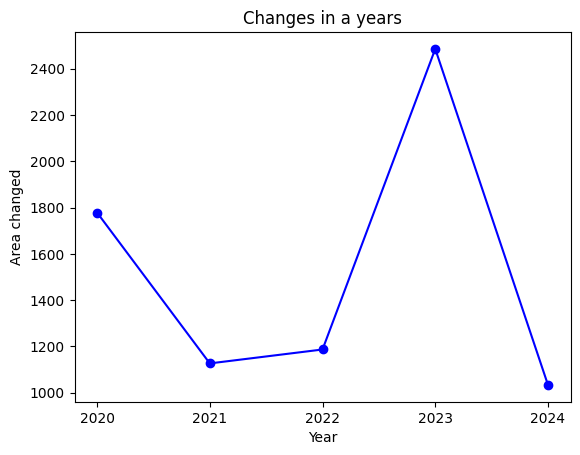

In [ ]:

import matplotlib.pyplot as pltt

# x axis values
x = white
# corresponding y axis values
y = [2020,2021,2022,2023,2024]


plt.plot(y,x, color='blue', marker='o',mfc='blue' ) #plot the data
plt.xticks(range(2020,2025, 1))
# plotting the points

# naming the x axis
plt.ylabel('Area changed')
# naming the y axis
plt.xlabel('Year')

# giving a title to my graph
plt.title('Changes in a years')

# function to show the plot
plt.show()
